### Simulation Data Aggregation


In [ ]:
%load_ext autoreload
%autoreload 2

import pandas as pd
from lens_simulation import utils
# path = r"\\ad.monash.edu\home\User028\pcle0002\Documents\repos\lens_simulation\src\lens_simulation\log\duly-fancy-panda\sweet-mako"
pd.set_option("display.max_rows", None, "display.max_columns", None)

directory = r"\\ad.monash.edu\home\User028\pcle0002\Documents\repos\lens_simulation\src\lens_simulation\log\barely-ideal-zebra"
directory = r"\\ad.monash.edu\home\User028\pcle0002\Documents\repos\lens_simulation\src\lens_simulation\log\lively-vital-duck"


df = utils.load_run_simulation_data(directory)

print(f"run: {os.path.basename(directory)}")
display(df.T)


df.to_csv("data.csv")

In [ ]:
display(df[df["exponent"] ==  2.1].T)


## Simulation Parameter Sweep


In [ ]:
%load_ext autoreload
%autoreload 2

from lens_simulation import utils
from pprint import pprint
from copy import deepcopy

# sweep
config = utils.load_config("config.yaml")

config["sweep"] = deepcopy(config)

pprint(config)


# config dict vs config yaml
# yaml creates the sweeps
# dicts create the objects




In [ ]:
%load_ext autoreload
%autoreload 2

%load_ext autoreload 
%autoreload 2
from lens_simulation import SimulationRunner


sim_runner = SimulationRunner.SimulationRunner("sweep.yaml")
# sim_runner.initialise_simulation()
sim_runner.setup_simulation()
# sim_runner.run_simulations()


In [ ]:
%load_ext autoreload
%autoreload 2
from lens_simulation.SimulationRunner import (get_lens_configurations, generate_lens_parameter_combinations, 
    generate_beam_parameter_combinations,  get_beam_configurations, generate_stage_parameter_combination, get_stage_configurations, 
    generate_simulation_parameter_sweep, sweep_custom_profiles)
from lens_simulation import utils
from lens_simulation.constants import LENS_SWEEPABLE_KEYS, MODIFICATION_SWEEPABLE_KEYS, BEAM_SWEEPABLE_KEYS, STAGE_SWEEPABLE_KEYS, GRATING_SWEEPABLE_KEYS, TRUNCATION_SWEEPABLE_KEYS, APERTURE_SWEEPABLE_KEYS
from lens_simulation import validation
from pprint import pprint
from copy import deepcopy


In [ ]:
config = utils.load_config("config.yaml")
info =  {"run_id": 9999, "run_petname": "test-carry-mule", "log_dir": "log"}


lc = config["lenses"][0]

# print("profiles:")
# pprint(lc["custom"])
# print("-"*50)
cp = sweep_custom_profiles(lc["custom"])

# print("custom_params: ", cp)

simulation_configurations = generate_simulation_parameter_sweep(config, info)

for sc in simulation_configurations:
    print("-"*50)
    for lc in sc["lenses"]:
        pprint(lc["custom"])

In [ ]:
from lens_simulation.Lens import generate_lens
from lens_simulation.Medium import Medium
from lens_simulation import utils
import matplotlib.pyplot as plt

for conf in simulation_configurations:

    # pprint(conf)
    lc = conf["lenses"][0]
    lens = generate_lens(lc, Medium(lc["medium"]), conf["sim_parameters"]["pixel_size"])

    plotting.plot_lens_profile_2d(lens)
    plt.show()

    plotting.plot_lens_profile_slices(lens)
    plt.show()



In [ ]:
directory = r"\\ad.monash.edu\home\User028\pcle0002\Documents\repos\lens_simulation\src\lens_simulation\log\hugely-subtle-drake"
df = utils.load_run_simulation_data(directory)

display(df.T)

### ZARR


### New Simulation Config


In [ ]:
%load_ext autoreload
%autoreload 2

from lens_simulation import utils
from pprint import pprint
from lens_simulation.beam import load_beam_config
from lens_simulation.Simulation import generate_simulation_options, generate_simulation_parameters, load_sim_stage_config
from lens_simulation.structures import SimulationConfig
from lens_simulation.Lens import load_lens_config
config = utils.load_config("sweep.yaml")
# conf_v2 = utils.load_config_struct("sweep.yaml")



In [ ]:

beam_settings = load_beam_config(config["beam"])

lenses = [load_lens_config(lc) for lc in config["lenses"]]
stages = [load_sim_stage_config(sc) for sc in config["stages"]]

options = generate_simulation_options(config, "log")
parameters = generate_simulation_parameters(config)


sim_config = SimulationConfig(
    beam=beam_settings,
    lenses=lenses,
    stages=stages,
    parameters=parameters,
    options=options
)


print("SIM CONFIG:")
pprint(sim_config.beam)
print("-"*50)
pprint(sim_config.lenses)
print("-"*50)
pprint(sim_config.stages)
print("-"*50)
pprint(sim_config.parameters)
print("-"*50)
pprint(sim_config.options)



### DASK Experiments


In [ ]:
import time
import dask


@dask.delayed
def inc(x):
    time.sleep(1)
    return x + 1

@dask.delayed
def add(x, y):
    time.sleep(1)
    return x + y

In [ ]:
%%time

a = inc(1)
b = inc(1)
c = add(a, b)
c.visualize("mydask.png")
# c.dask
# c = c.compute()


In [ ]:
## ZARR

In [ ]:
import zarr
z = zarr.zeros((10000, 10000), chunks=(1000, 1000), dtype='i4')
print(z.info)

z1 = zarr.open('data/example.zarr', mode='w', shape=(10000, 10000), chunks=(1000, 1000), dtype='i4')

import numpy as np
a = np.arange(10)
zarr.save('data/example.zarr', a)
zarr.load('data/example.zarr')

In [ ]:


def save_simulation_zarr(arr, fname):
    print("saving zarr")
    zarr.save(fname, arr)

def load_simulation_zarr(fname):
    print("loading zarr")
    arr = zarr.open(fname)
    return arr

In [ ]:
fname = "data/zarr_test.zarr"


# sim = zarr.zeros(shape=(100, 10000, 10000), dtype=np.float32)
sim = zarr.zeros(shape=(1000, 1000, 10000), chunks=(100, 100), dtype=np.float32)
# save_simulation_zarr(sim, fname)

# TODO: why doesnt this open work for slicing?
sim = zarr.open(fname, mode="w", shape=(1000, 1000, 10000), chunks=(1000, 1000), dtype=np.float32)



In [ ]:
# arr = zarr.load(fname)  # load as np, bad

In [ ]:
# sim = load_simulation_zarr(fname)

print(sim.shape)
print(type(sim))

cy, cx = sim.shape[1] // 2, sim.shape[2] //2
import matplotlib.pyplot as plt
plt.imshow(sim[:, cy, :])
plt.show()


In [ ]:

ones = np.ones(shape=(sim.shape[1], sim.shape[2]))

sweep = np.outer(np.arange(sim.shape[1]), np.arange(sim.shape[2]).T)

plt.imshow(sweep)
plt.show()

print(ones.shape)


In [ ]:

for i in range(sim.shape[0]):
    print("step: ", i)
    sim[i, :, :] = sweep * i



In [ ]:
cy

cw = 500

fig = plt.figure(figsize=(12, 5))
plt.imshow(sim[:, cw-100:cw+100, 500])
plt.colorbar()
plt.show()

# # cx
plt.imshow(sim[:, 500, cx-100:cx+100])
plt.colorbar()
plt.show()

In [ ]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from lens_simulation import utils 


fname = "data/example.npy"
arr = np.ones(shape=(100, 100))

arr = np.pad(arr, 20, mode="constant", constant_values=0)
np.save(fname, arr)

ap_fname = "data/example.aperture.npy"

distance = utils.create_distance_map_px(arr.shape[1], arr.shape[0])

ap = distance > 10
plt.imshow(ap)
plt.show()

np.save(ap_fname, ap)


arr2 = np.load(fname)

plt.imshow(arr2)
plt.colorbar()
plt.show()


In [ ]:
import os
import glob

from lens_simulation.SimulationRunner import sweep_custom_profiles

profs = sweep_custom_profiles(os.path.dirname(fname))
print(profs)



In [ ]:
from lens_simulation.Lens import load_aperture, generate_lens
from lens_simulation.Medium import Medium
        
config = utils.load_config("config.yaml")

# config["lenses"][0]["custom"] = "data/subdir/example2.npy"
config["lenses"][0]["custom"] = "data/example.npy"


lens = generate_lens(config["lenses"][0], Medium(1), pixel_size=1.e-6)

plt.imshow(lens.profile)
plt.show()

plt.imshow(lens.aperture)
plt.show()


## Update GIF Functions

In [ ]:
%load_ext autoreload
%autoreload 2

from lens_simulation import utils, plotting
from IPython.display import Image
import imageio

path = r"C:\Users\pcle0002\Documents\repos\lens_simulation\src\lens_simulation\log\surely-ruling-tetra\brief-macaw\1/sim.zarr"

plotting.save_propagation_gif(path)
 
Image(os.path.join(os.path.dirname(path), "propagation.gif"))


## Sheet Cleaning Tool
prototype work for sheet cleaning tool

nsize:  5000
shape:  (50, 1, 50001)
centre_max:  27061326.0
mask shape:  (50, 10000)
max z:  21


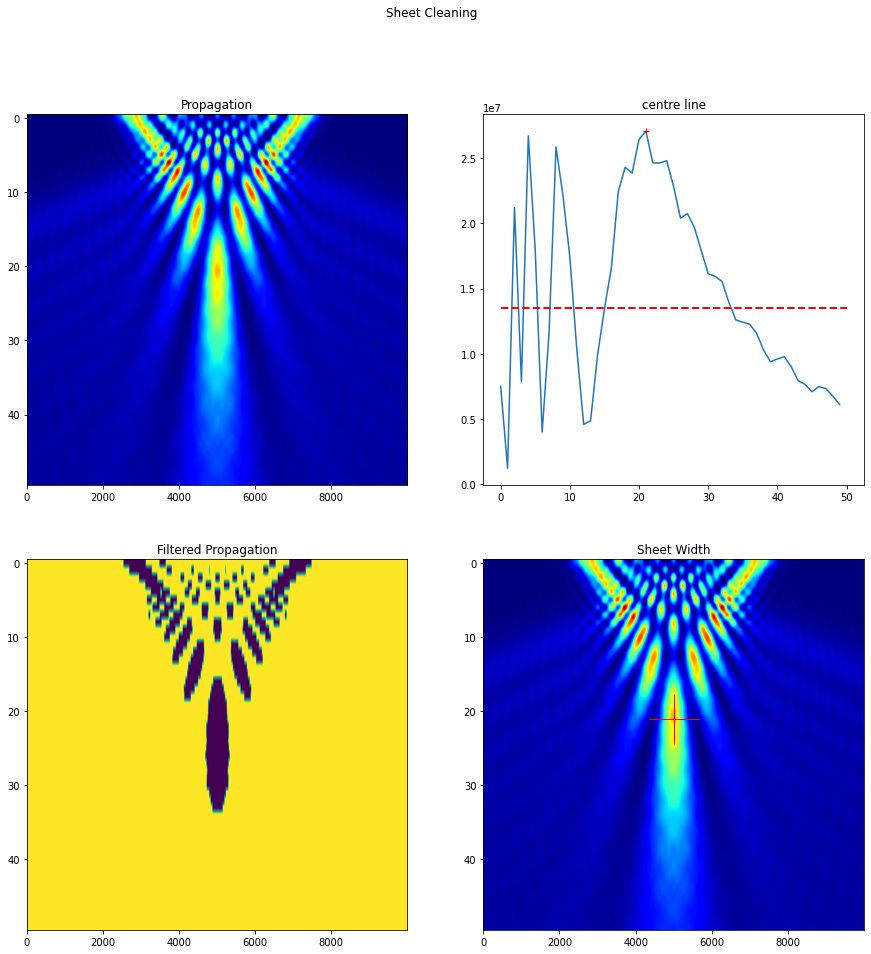

In [2]:
from lens_simulation import utils
from IPython.display import Image
import os
import matplotlib.pyplot as plt
import numpy as np

# path = r"C:\Users\pcle0002\Documents\repos\lens_simulation\src\lens_simulation\log\neatly-fine-bedbug/mighty-ray\1"
path = r"C:\Users\pcle0002\Documents\repos\lens_simulation\src\lens_simulation\log\sadly-active-chimp\star-colt\1"


sim = utils.load_simulation(os.path.join(path, "sim.zarr"))

cz = sim.shape[0] // 2
cy = sim.shape[1] // 2
cx = sim.shape[2] // 2
nsize = int(5e-6 / 1e-9)

print("nsize: ",  nsize)
print("shape: ", sim.shape)


sim_slice = sim[:, cy, cx-nsize: cx+nsize]


# plot middle
# max_val = np.max(sim_slice)
# max_z, max_x = np.argmax(sim_slice, 0), np.argmax(sim_slice, 1)
cx_slice = sim_slice.shape[1] // 2
sim_centre = sim_slice[:, cx_slice]
centre_max = np.max(sim_centre)
print("centre_max: ", centre_max)


# filter half maximum
mask = sim_slice < centre_max // 2
print("mask shape: ", mask.shape)


# TODO: sheet width
max_z = np.argmax(sim_centre)
print("max z: ", max_z)



fig, ax = plt.subplots(2, 2, figsize=(15, 15))

ax[0, 0].imshow(sim_slice, aspect="auto", cmap="jet", interpolation="spline36")
ax[0, 0].set_title("Propagation")

ax[0, 1].plot(sim_centre)
ax[0, 1].plot(np.argmax(sim_centre), np.max(sim_centre), "r+", label="Maximum value")
ax[0, 1].set_title("centre line")
ax[0, 1].hlines(centre_max / 2, 0, len(sim_centre), colors="red", linestyles="--", lw=2, label="Half Maximum")

ax[1, 0].imshow(mask, aspect="auto")
ax[1, 0].set_title("Filtered Propagation")

ax[1, 1].imshow(sim_slice, aspect="auto", cmap="jet", interpolation="spline36")
ax[1, 1].plot(cx_slice, max_z , "r+", ms=50)
ax[1, 1].set_title("Sheet Width")

plt.suptitle("Sheet Cleaning")
plt.show()

# Image(os.path.join(path, "topdown.png"))


### Global Propagation Visualisation
View the entire propagation as a single array plot




The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
STAGES:  4


C:\Users\pcle0002\AppData\Local\Temp\ipykernel_13364\4145494613.py:43: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(td.T), cmap="jet", aspect="auto")


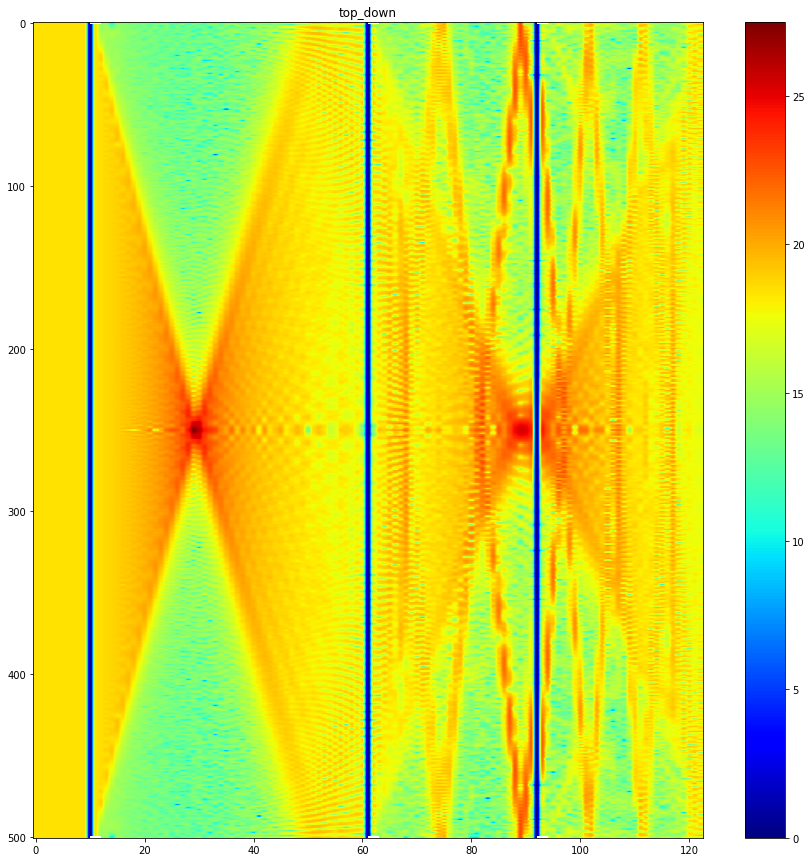

C:\Users\pcle0002\AppData\Local\Temp\ipykernel_13364\4145494613.py:50: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(so.T), cmap="jet", aspect="auto")


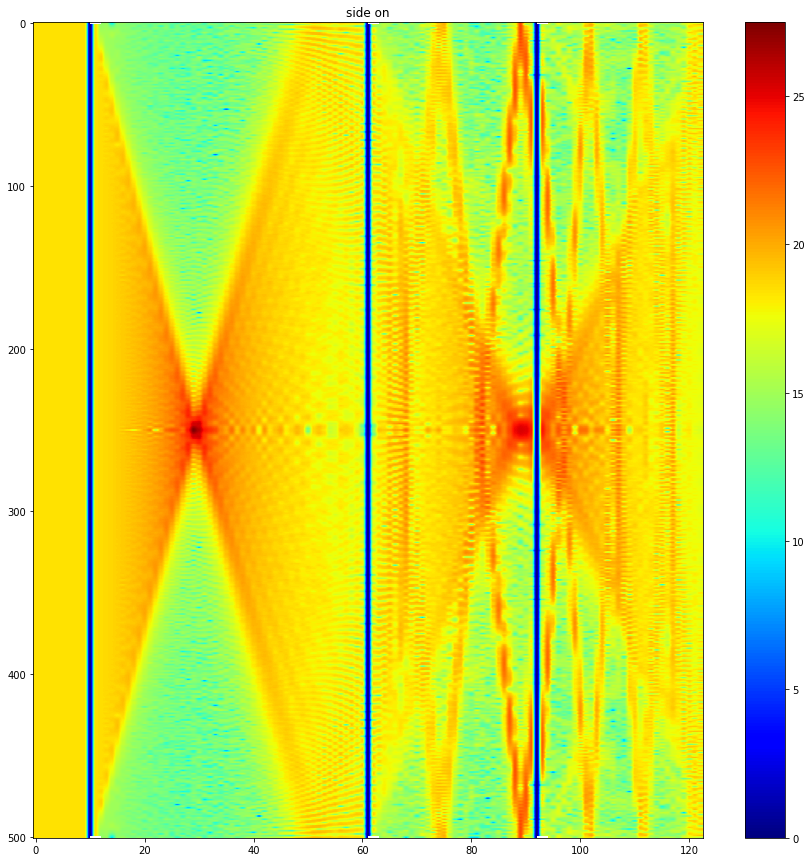

In [37]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
from lens_simulation import utils, plotting
from IPython.display import Image
import os

from pprint import pprint

path = r"C:\Users\pcle0002\Documents\repos\lens_simulation\src\lens_simulation\log\fairly-cosmic-doe\tight-yeti"
path = r"C:\Users\pcle0002\Documents\repos\lens_simulation\src\lens_simulation\log\lively-equal-slug\still-clam"

def plot_full_sim(path):
    metadata = utils.load_metadata(path)

    n_stages = len(metadata["stages"]) + 1

    print("STAGES: ", n_stages)

    sim_paths = [os.path.join(path, str(i), "sim.zarr") for i in range(n_stages)]

    td, so = None, None

    for sim_path in sim_paths:
        sim = utils.load_simulation(sim_path)
        top_down, side_on = plotting.create_sim_views(sim)
        lens = np.ones(shape=(1, top_down.shape[1]))

        if td is None:
            td = top_down
        else:
            td = np.vstack([td, lens, top_down])

        lens = np.ones(shape=(1, side_on.shape[1]))
        if so is None:
            so = side_on
        else:
            so = np.vstack([so, lens, side_on])

    fig = plt.figure(figsize=(15, 15))
    plt.imshow(np.log(td.T), cmap="jet", aspect="auto")
    plt.colorbar()
    plt.title("top_down")
    plt.show()


    fig = plt.figure(figsize=(15, 15))
    plt.imshow(np.log(so.T), cmap="jet", aspect="auto")
    plt.colorbar()
    plt.title("side on")
    plt.show()


plot_full_sim(path)


STAGES:  4


C:\Users\pcle0002\AppData\Local\Temp\ipykernel_13364\4145494613.py:43: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(td.T), cmap="jet", aspect="auto")


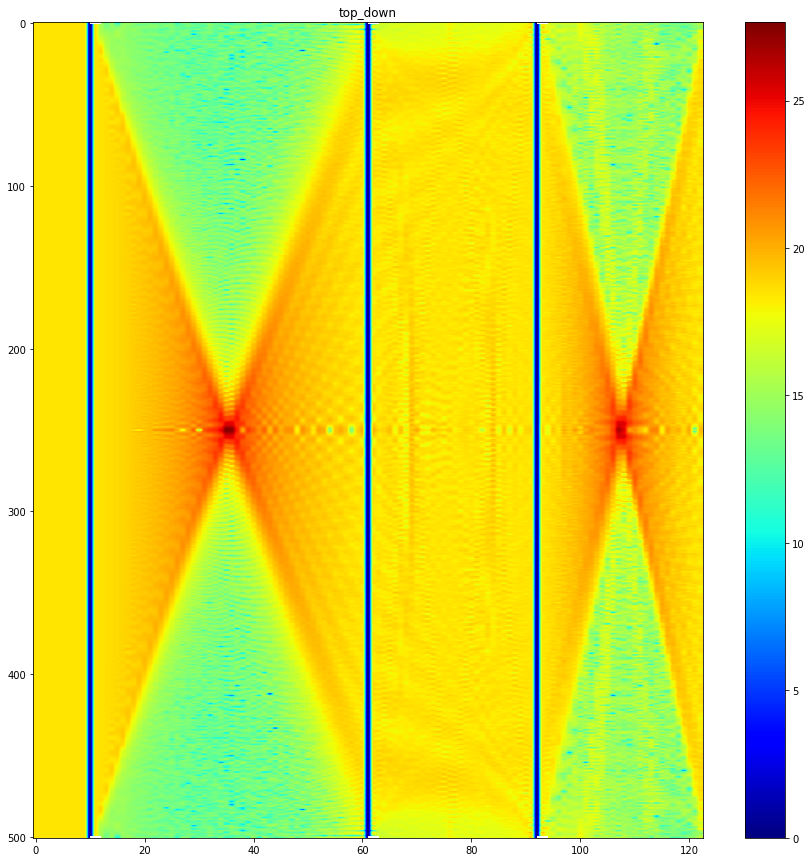

C:\Users\pcle0002\AppData\Local\Temp\ipykernel_13364\4145494613.py:50: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(so.T), cmap="jet", aspect="auto")


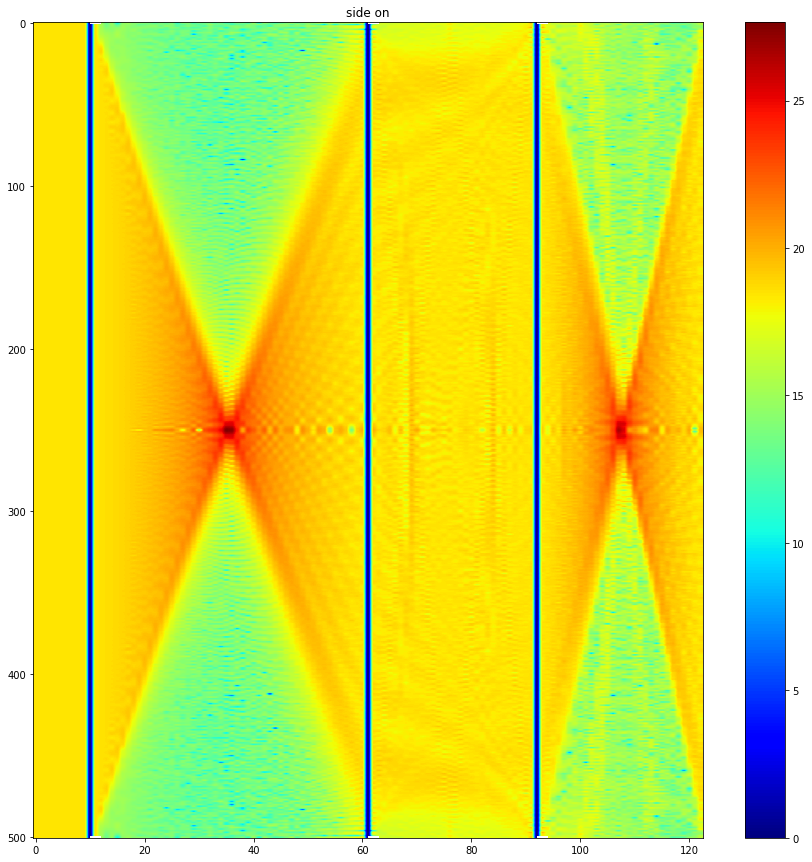

In [48]:
plot_full_sim(r"C:\Users\pcle0002\Documents\repos\lens_simulation\src\lens_simulation\log\safely-nice-cobra\true-crow")